In [1]:
import numpy as np
import networkx as nx

def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [2]:
#for scale free networks with exponent=2
import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())

phi_0 = []
phi_0 = np.random.randint(10, 20, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
for x in x_vals:
    diff = np.var(np.array(phi_0))
    L = genlaplacian(G, x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    t=0.05
    while (diff > 0.00001) :
        Phi = (phi_0V* (np.exp(-D*t))) #Exponential decay for each component
        Phi = np.dot(V,Phi)               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
equi_tvals.append(t_vals)   

NameError: name 'equi_tvals' is not defined

1000
5.206


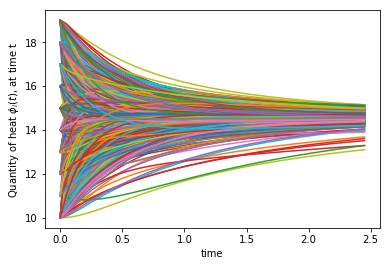

In [4]:
#for scale free networks with exponent=2
import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
print(n)

av_lst=[]
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
#av_lst.append(avedegree)
print(avedegree)

phi_0 = np.random.randint(10, 20, size=n)

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions

D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()   

1000
5.404


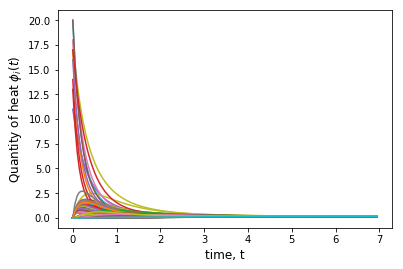

In [24]:
#Diffusion on scale free networks with exponent=2.3


import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

rand_lst = [ random.randint(10, 20) for i in range(0,10)]

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
print(n)

av_lst=[]
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
#av_lst.append(avedegree)
print(avedegree)

Deg_lst = list(nx.degree_centrality(G).values())
sel_index = np.argsort(Deg_lst)[-10:]
#print(sel_index)
phi_0 = [0]*n

j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,7,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/Barabasiexp23.eps', format='eps', dpi=1000)
plt.show()   

1000
5.206


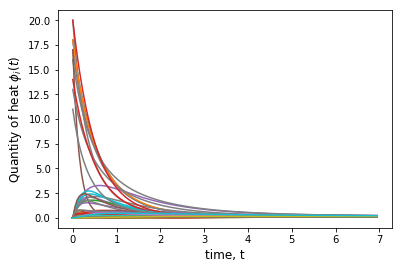

In [26]:
#Diffusion on scale free networks with exponent=2.0

fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
print(n)

av_lst=[]
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
#av_lst.append(avedegree)
print(avedegree)

Deg_lst = list(nx.degree_centrality(G).values())
sel_index = np.argsort(Deg_lst)[-10:]
phi_0 = [0]*n

j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,7,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/Barabasiexp2.eps', format='eps', dpi=1000)
plt.show()     

1000
6.302


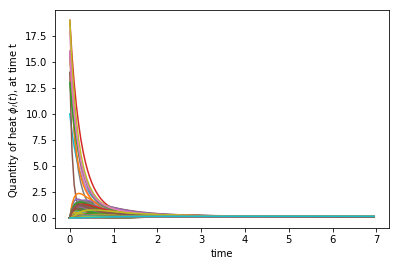

In [17]:
#Diffusion on scale free networks with exponent=2.7

fh=open("graph-exponent-2.7.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
print(n)

av_lst=[]
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
#av_lst.append(avedegree)
print(avedegree)

Deg_lst = list(nx.degree_centrality(G).values())
sel_index = np.argsort(Deg_lst)[-10:]
phi_0 = [0]*n

j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,7,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
#plt.savefig('/home/alicenanyanzi/RecentProject/AliceThesis-Stellenbosch/images/Barabasiexp2.eps', format='eps', dpi=1000)
plt.show()   

In [29]:
import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

rand_lst = [ random.randint(10, 20) for i in range(0,100)]

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
Deg_lst = list(nx.degree_centrality(G).values())

c= 0
av = sum(Deg_lst)/n
for i in Deg_lst:
    if(i>= av):
        c = c+1
print(c)

306


In [30]:
fh=open("graph-exponent-3.0.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
Deg_lst = list(nx.degree_centrality(G).values())

c= 0
av = sum(Deg_lst)/n
for i in Deg_lst:
    if(i>= av):
        c = c+1
print(c)

292


In [31]:
fh=open("graph-exponent-2.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
Deg_lst = list(nx.degree_centrality(G).values())

c= 0
av = sum(Deg_lst)/n
for i in Deg_lst:
    if(i>= av):
        c = c+1
print(c)

227


In [32]:
fh=open("graph-exponent-2.7.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())
Deg_lst = list(nx.degree_centrality(G).values())

c= 0
av = sum(Deg_lst)/n
for i in Deg_lst:
    if(i>= av):
        c = c+1
print(c)

310


In [ ]:
#for scale free networks with exponent=2
import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.3.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())

phi_0 = []
phi_0 = np.random.randint(10, 20, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
for x in x_vals:
    diff = np.var(np.array(phi_0))
    L = genlaplacian(G, x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    t=0.05
    while (diff > 0.00001) :
        Phi = (phi_0V* (np.exp(-D*t))) #Exponential decay for each component
        Phi = np.dot(V,Phi)               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
equi_tvals.append(t_vals)   

In [ ]:
#for scale free networks with exponent=2.7
import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

fh=open("graph-exponent-2.7.dat", 'rb')
G=nx.read_edgelist(fh)
fh.close()
n = len(G.nodes())

phi_0 = []
phi_0 = np.random.randint(10, 20, size=n)

x_vals = np.arange(0,0.5,0.005)
t_vals =[]
for x in x_vals:
    diff = np.var(np.array(phi_0))
    L = genlaplacian(G, x)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    t=0.05
    while (diff > 0.00001) :
        Phi = (phi_0V* (np.exp(-D*t))) #Exponential decay for each component
        Phi = np.dot(V,Phi)               
        phi_t = (Phi.ravel()).tolist()            
        diff = np.var(np.array(phi_t))
        t = t+0.05
    t_vals.append(t-0.05)
equi_tvals.append(t_vals)   

In [ ]:
for l in equi_tvals:
    plt.plot(x_vals,l)
plt.xlabel('x values')
plt.ylabel('Equilibrium time')
#plt.ylim(0.0,1.0)
plt.title('Diffusion of heat over a E_R(100,0.06) network')
plt.legend()
plt.show()